In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
%matplotlib inline

In [14]:
cancer_data = pd.read_csv(r"C:\Users\Z7\Documents\BOoO\LUNG\survey lung cancer.csv")
cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [12]:
cancer_data.shape

(309, 16)

In [15]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [16]:
# Signature: cancer_data.isnull() -> 'DataFrame'
# Docstring:
# Detect missing values.
# Return a boolean same-sized object indicating if the values are NA.
cancer_data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [26]:
# First, we will change the data types of the categorical variables 
cancer_data['LUNG_CANCER'] = cancer_data['LUNG_CANCER'].factorize(['NO','YES'])[0]
cancer_data['GENDER'] = cancer_data['GENDER'].factorize(['NO','YES'])[0]

In [28]:
cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<AxesSubplot:>

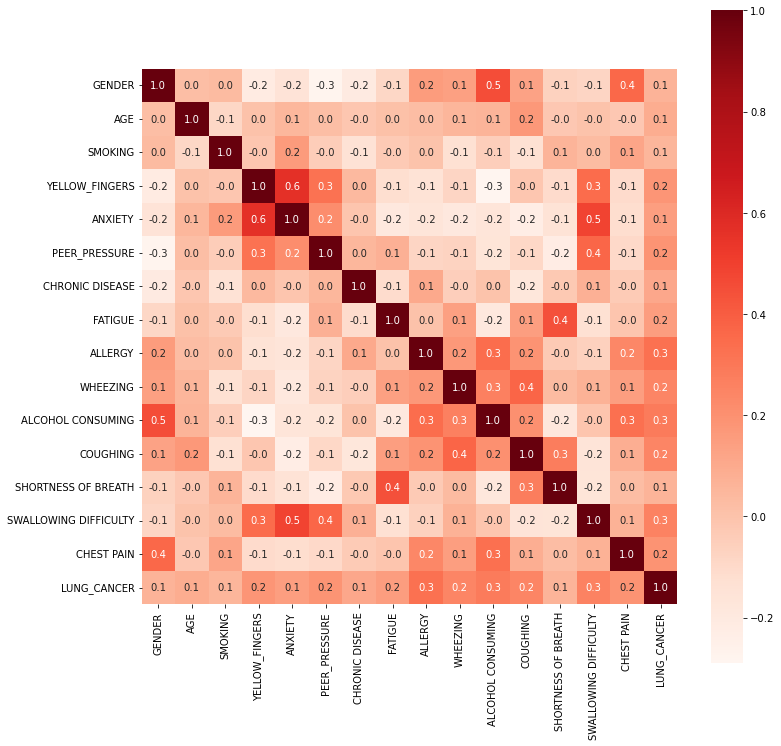

In [29]:
# check correlation between the variables.

corr = cancer_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

In [33]:
# rename the 1s and 2s to No and Yes - easier to understand
cancer_data["GENDER"] = cancer_data["GENDER"].replace({1:"Male", 0:"Female"})
cancer_data["LUNG_CANCER"] = cancer_data["LUNG_CANCER"].replace({1:"Yes", 0:"No"})
for column in cancer_data.columns:
    cancer_data[column] = cancer_data[column].replace({1: "No", 2: "Yes"})
    
cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,No
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No


<AxesSubplot:xlabel='CHEST PAIN', ylabel='count'>

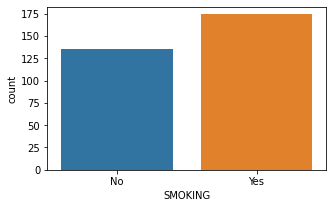

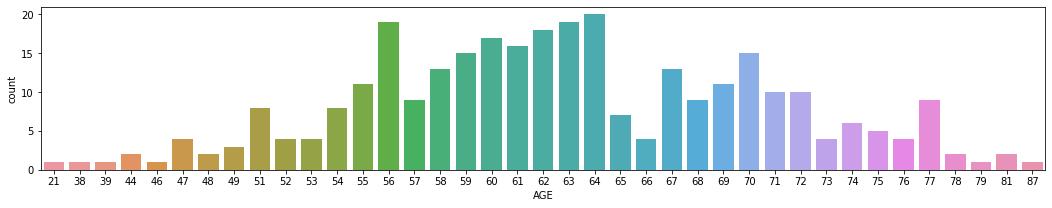

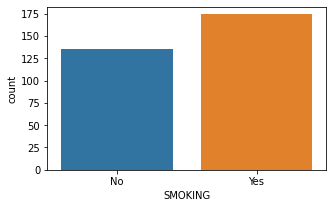

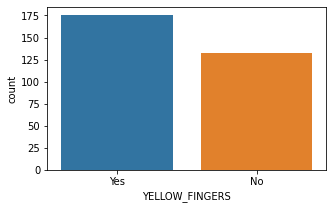

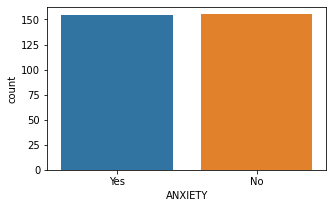

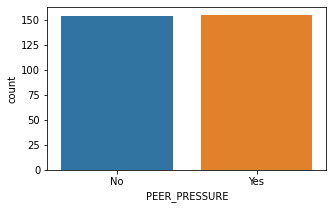

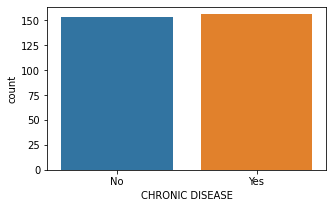

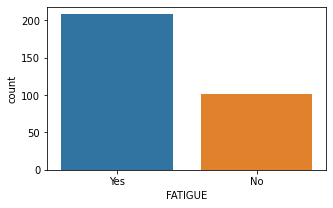

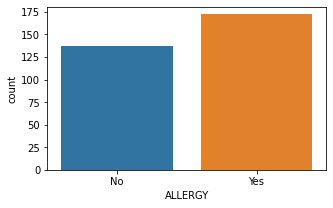

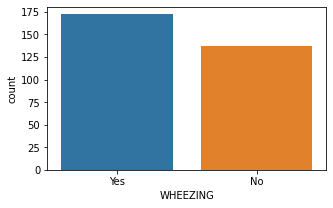

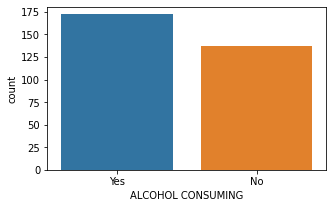

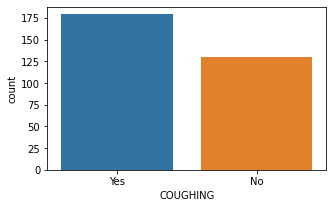

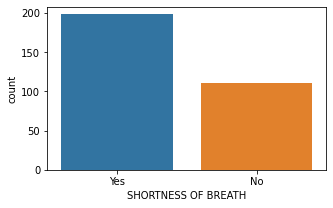

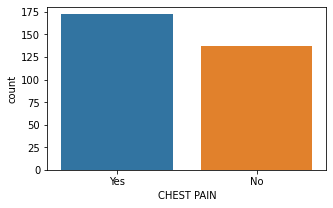

In [58]:
# Features count

plt.figure(figsize=(5,3))
sns.countplot(x="SMOKING", data=cancer_data)
plt.figure(figsize=(18,3))
sns.countplot(x="AGE", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="SMOKING", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="YELLOW_FINGERS", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="ANXIETY", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="PEER_PRESSURE", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="CHRONIC DISEASE", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="FATIGUE", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="ALLERGY", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="WHEEZING", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="ALCOHOL CONSUMING", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="COUGHING", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="SHORTNESS OF BREATH", data=cancer_data)
plt.figure(figsize=(5,3))
sns.countplot(x="CHEST PAIN", data=cancer_data)

**More smokers in the dataset compared to non smokers.**

<AxesSubplot:ylabel='LUNG_CANCER'>

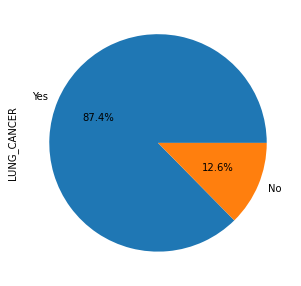

In [60]:
# Percentage of people with lung cancer in the dataset

# 100. * cancer_data.LUNG_CANCER.value_counts() / len(cancer_data.LUNG_CANCER)
cancer_data.LUNG_CANCER.value_counts().plot(kind='pie',figsize=(5, 5),autopct='%1.1f%%')

In [61]:
100. * cancer_data.LUNG_CANCER.value_counts() / len(cancer_data.LUNG_CANCER)

Yes    87.378641
No     12.621359
Name: LUNG_CANCER, dtype: float64

<AxesSubplot:xlabel='AGE', ylabel='Count'>

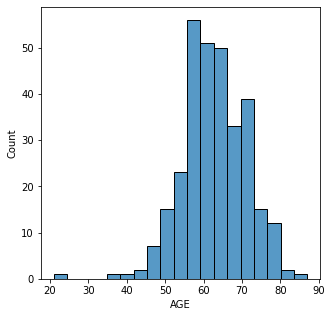

In [63]:
plt.figure(figsize = (5,5))
sns.histplot(cancer_data['AGE'])

In [64]:
cancer_data.GENDER.value_counts()

Male      162
Female    147
Name: GENDER, dtype: int64

<AxesSubplot:xlabel='GENDER', ylabel='count'>

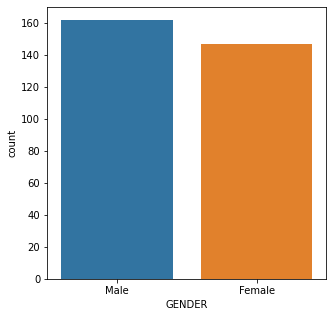

In [65]:
plt.figure(figsize=(5,5))
sns.countplot(x="GENDER", data=cancer_data)

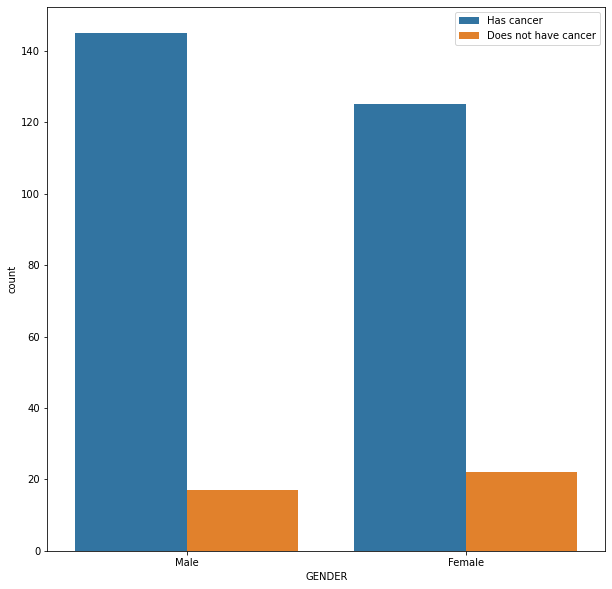

In [66]:
# Lung Cancer across Genders
plt.figure(figsize=(10,10))
sns.countplot(data=cancer_data,x='GENDER',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

IndexError: list index out of range

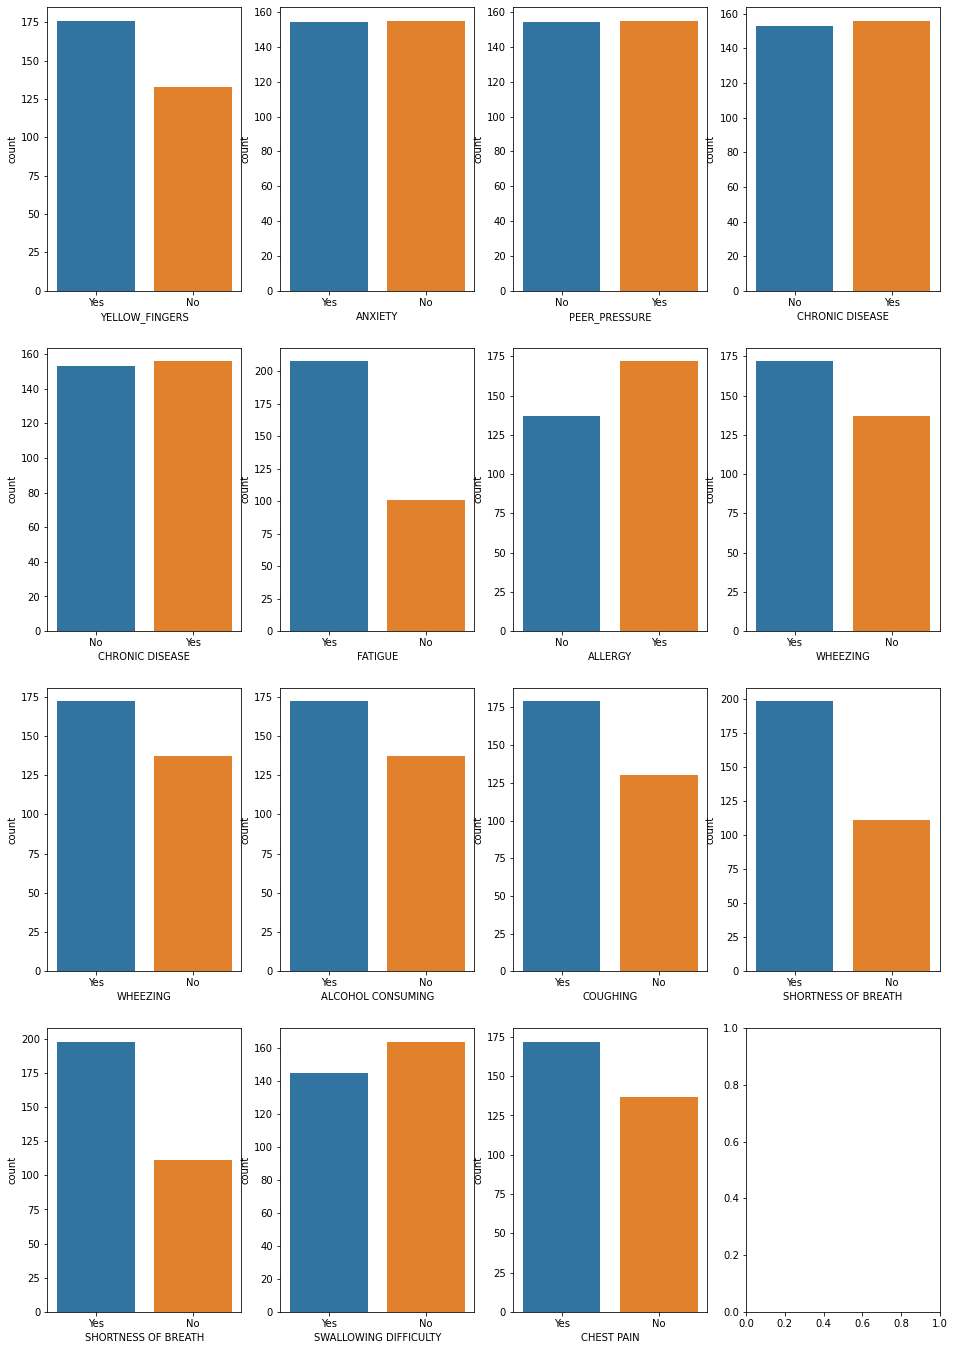

In [73]:
X = ['YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'SWALLOWING DIFFICULTY', 'CHEST PAIN']
# 16 subplots
fig, ax = plt.subplots(nrows = 4, ncols = 4) 
fig.set_size_inches(16,24) # set figure size

for i in range(4):
    for j in range(4):
        sns.countplot(x = cancer_data[X[3 * i + j]] , ax = ax[i][j]) # count plot

**After plotting multiple countplots for the different features, we can see that most surveyors said yes to having symptoms such as 'yellow fingers', 'coughing', 'fatigue', 'shortness of breath' and 'chest pain' meaning these are the primary/more crucial symptoms that people should look out for as they may be at risk of having cancer.**

**Let's analyze the likeliness of having the symptoms a little more.**

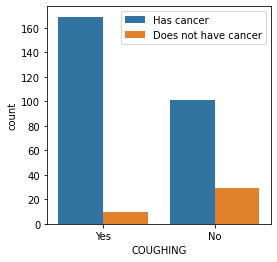

In [70]:
plt.figure(figsize=(4,4))
sns.countplot(data=cancer_data,x='COUGHING',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

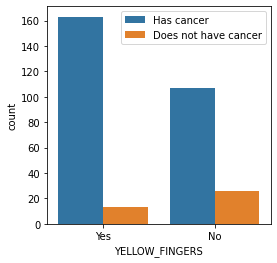

In [76]:
plt.figure(figsize=(4,4))
sns.countplot(data=cancer_data,x='YELLOW_FINGERS',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

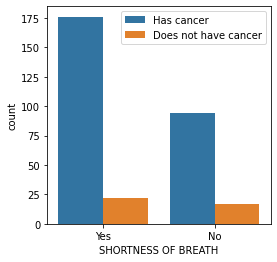

In [77]:
plt.figure(figsize=(4,4))
sns.countplot(data=cancer_data,x='SHORTNESS OF BREATH',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

**Interestingly, in all three of the plots we can see that it doesn't really matter if the symptoms are showing or not as some people may have cancer yet not show any symptoms. So, regular checkups would be wiser than waiting for symptoms to show up as that may lead it to deteriorate conditions.**

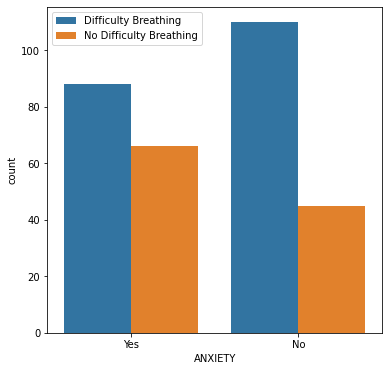

In [78]:
plt.figure(figsize=(6,6))
sns.countplot(data=cancer_data,x='ANXIETY',hue='SHORTNESS OF BREATH')
plt.legend(["Difficulty Breathing", 'No Difficulty Breathing'])

**Earlier, I inferred that more anxiety may lead to more difficulty in breathing but we can see from this visualization that it does not really matter if someone has anxiety or not, most surveyors have difficulty breathing and this may be directly correlated to having cancer.**

Predict Lung Cancer  using 6 different algorithm:
1. Logistic regression classification
2. SVM (Support Vector Machine) classification
3. Naive bayes classification
4. Decision tree classification
5. Random forest classification
6. K-Nearest Neighbor classification

Predictor variable use in classifying lung cancer:
1. GENDER
2. AGE
3. SMOKING
4. YELLOW_FINGERS
5. ANXIETY
6. PEER_PRESSURE
7. CHRONIC DISEASE
8. FATIGUE
9. ALLERGY
10. WHEEZING
11. ALCOHOL
12. CONSUMING
13. COUGHING
14. SHORTNESS OF BREATH
15. SWALLOWING DIFFICULTY
16. CHEST PAIN

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv(r"C:\Users\Z7\Documents\BOoO\LUNG\survey lung cancer.csv")
print('Dataset :',data.shape)
data.info()
data[0:10]

Dataset : (309, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUN

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


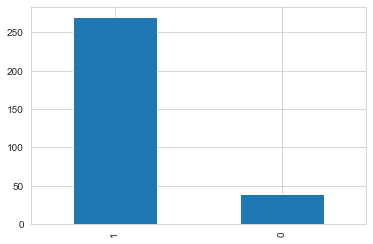

In [29]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].factorize(['NO','YES'])[0]
data['GENDER'] = data['GENDER'].factorize(['NO','YES'])[0]
data[0:10]

# Distribution of diagnosis
data['LUNG_CANCER'].value_counts()[:].plot(kind='bar')
plt.show()

C:\Users\Z7\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


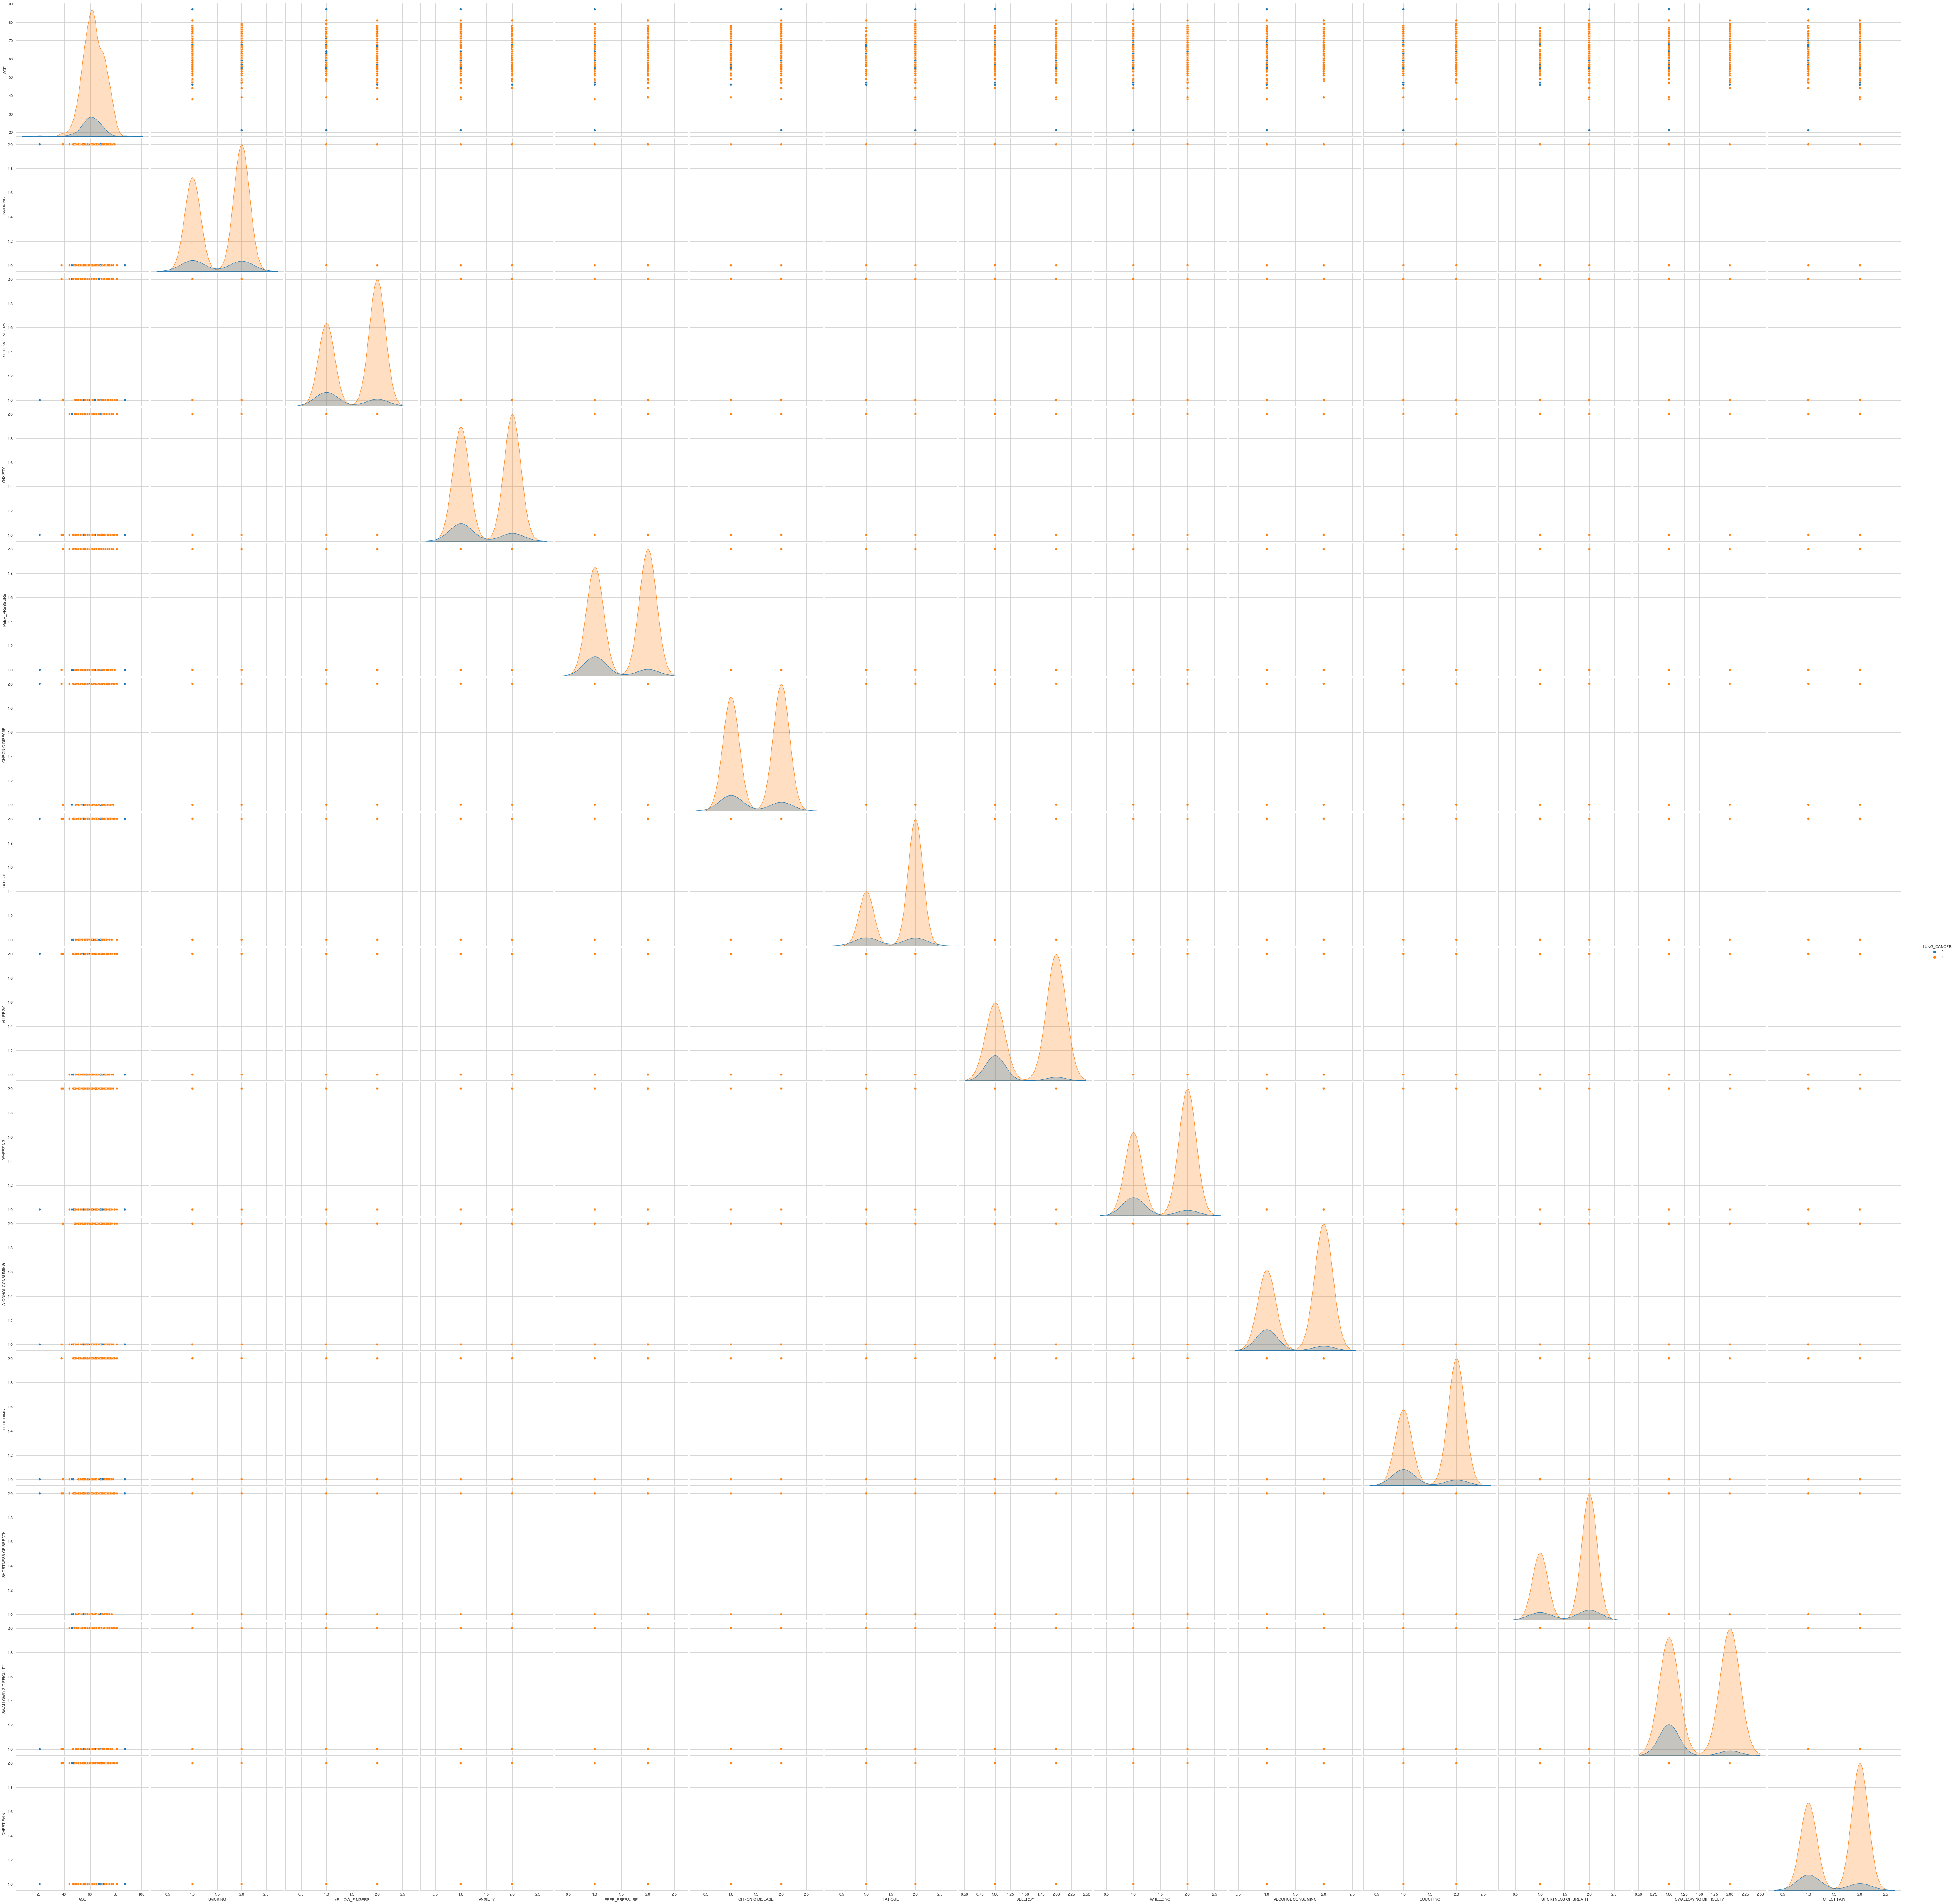

In [18]:
sns.set_style("whitegrid")
sns.pairplot(data,hue='LUNG_CANCER',size=5);
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
Y = data['LUNG_CANCER']
X = data.drop(columns=['LUNG_CANCER'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [32]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (278, 15)
Y train shape:  (278,)
X test shape:  (31, 15)
Y test shape:  (31,)


## 1. Logistic regression classification

Logistic regression is a technique that can be applied to binary classification problems. This technique uses the logistic function or sigmoid function, which is an S-shaped curve that can assume any real value number and assign it to a value between 0 and 1, but never exactly in those limits. Thus, logistic regression models the probability of the default class (the probability that an input $(X)$ belongs to the default class $(Y=1)$) $(P(X)=P(Y=1|X))$. In order to make the prediction of the probability, the logistic function is used, which allows us to obtain the log-odds or the probit. Thus, the model is a linear combination of the inputs, but that this linear combination relates to the log-odds of the default class.

Started from make an instance of the model setting the default values. Specify the inverse of the regularization strength in 10. Trained the logistic regression model with the training data, and then applied such model to the test data.

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# defining the model
logreg = LogisticRegression(C=10)

# training the model
logreg.fit(X_train, Y_train)

# predicting target values
Y_predict1 = logreg.predict(X_test)

C:\Users\Z7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


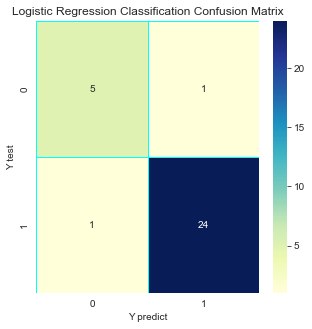

In [34]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [35]:
# Test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.9354838709677419


In [131]:
pre_logreg = precision_score(X_test, Y_test)
print('Precision: %.3f' % precision)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

## 2. SVM (Support Vector Machine) classification

SVMs (Support Vector Machine) have shown a rapid proliferation during the last years. The learning problem setting for SVMs corresponds to a some unknown and nonlinear dependency (mapping, function) $y = f(x)$ between some high-dimensional input vector $x$ and scalar output $y$. It is noteworthy that there is no information on the joint probability functions, therefore, a free distribution learning must be carried out. The only information available is a training data set $D = {(x_i, y_i) ∈ X×Y }, i = 1$, $l$, where $l$ stands for the number of the training data pairs and is therefore equal to the size of the training data set $D$, additionally, $y_i$ is denoted as $d_i$, where $d$ stands for a desired (target) value. Hence, SVMs belong to the supervised learning techniques.

From the classification approach, the goal of SVM is to find a hyperplane in an N-dimensional space that clearly classifies the data points. Thus hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.




In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# defining the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# training model
svmcla.fit(X_train, Y_train)

# predicting target values
Y_predict2 = svmcla.predict(X_test)

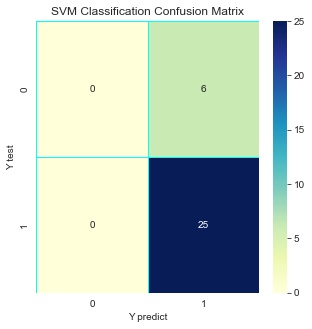

In [38]:
# The confusion matrix
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [39]:
# Test score
score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)

0.8064516129032258


## 3. Naive bayes classification

The naive Bayesian classifier is a probabilistic classifier based on Bayes' theorem with strong independence assumptions between the features. Thus, using Bayes theorem $\left(P(X|Y)=\frac{P(Y|X)P(X)}{P(Y)}\right)$, we can find the probability of $X$ happening, given that $Y$ has occurred. Here, $Y$ is the evidence and $X$ is the hypothesis. The assumption made here is that the presence of one particular feature does not affect the other (the predictors/features are independent). Hence it is called naive. In this case we will assume that we assume the values are sampled from a Gaussian distribution and therefore we consider a Gaussian Naive Bayes.

In [40]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

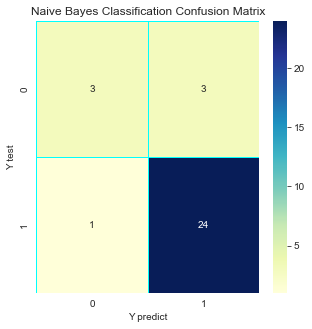

In [41]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [42]:
# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.8709677419354839


## 4. Decision tree classification

A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The decision tree analyzes a set of data to construct a set of rules or questions, which are used to predict a class, i.e., the goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In this sense the decision tree selects the best attribute using to divide the records, converting that attribute into a decision node and dividing the data set into smaller subsets, to finally start the construction of the tree repeating this process recursively. 

In [43]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

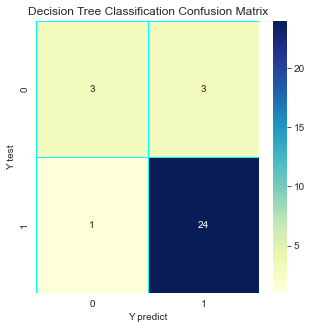

In [44]:
# The confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [45]:
# Test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.8709677419354839


## 5. Random forest classification

Based on the previous classification method, random forest is a supervised learning algorithm that creates a forest randomly. This forest, is a set of decision trees, most of the times trained with the bagging method. The essential idea of bagging is to average many noisy but approximately impartial models, and therefore reduce the variation. Each tree is constructed using the following algorithm:

* Let $N$ be the number of test cases, $M$ is the number of variables in the classifier.
* Let $m$ be the number of input variables to be used to determine the decision in a given node; $m<M$.
* Choose a training set for this tree and use the rest of the test cases to estimate the error.
* For each node of the tree, randomly choose $m$ variables on which to base the decision. Calculate the best partition of the training set from the $m$ variables.

For prediction a new case is pushed down the tree. Then it is assigned the label of the terminal node where it ends. This process is iterated by all the trees in the assembly, and the label that gets the most incidents is reported as the prediction. We define the number of trees in the forest in 100. 

In [46]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

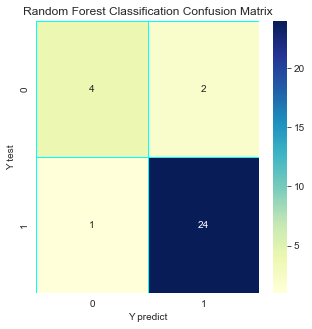

In [47]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [48]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.9032258064516129


## 6. K-Nearest Neighbor classification

K-Nearest neighbors is a technique that stores all available cases and **classifies new cases based on a similarity measure (e.g., distance functions)**. This technique is non-parametric since there are no assumptions for the distribution of underlying data and it is lazy since it does not need any training data point model generation. All the training data used in the test phase. **This makes the training faster and the test phase slower and more costlier. In this technique, the number of neighbors k is usually an odd number if the number of classes is 2**. For finding closest similar points,  find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.



In [49]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

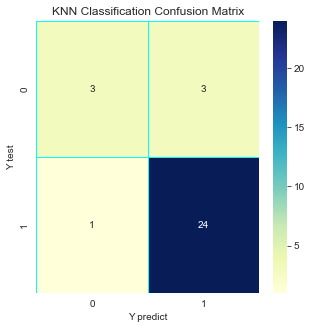

In [50]:
# The confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [51]:
# Test score
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.8709677419354839


In [52]:
Testscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score       0.935484
Support Vector Machine Score    0.806452
Naive Bayes Score               0.870968
Decision Tree Score             0.870968
Random Forest Score             0.903226
K-Nearest Neighbour Score       0.870968
dtype: float64


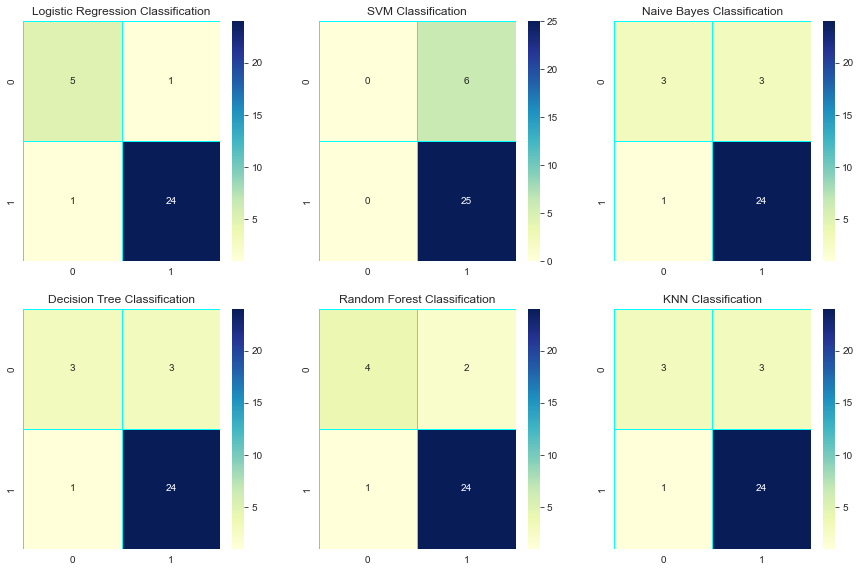

In [53]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax6)
plt.show()

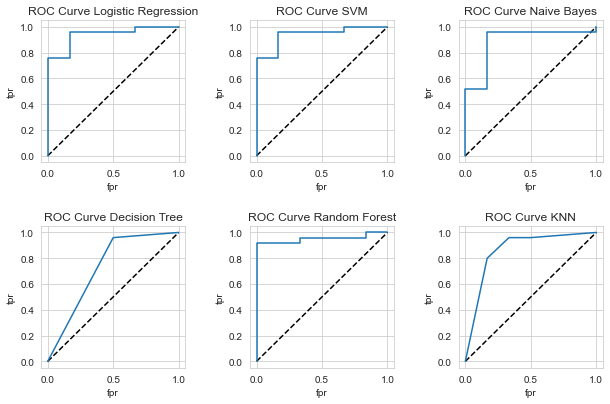

In [54]:
from sklearn.metrics import roc_curve

# Logistic Regression Classification
Y_predict1_proba = logreg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict1_proba)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

# SVM Classification
Y_predict2_proba = svmcla.predict_proba(X_test)
Y_predict2_proba = Y_predict2_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict2_proba)
plt.subplot(332)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve SVM')
plt.grid(True)

# Naive Bayes Classification
Y_predict3_proba = nbcla.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict3_proba)
plt.subplot(333)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)

# Decision Tree Classification
Y_predict4_proba = dtcla.predict_proba(X_test)
Y_predict4_proba = Y_predict4_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict4_proba)
plt.subplot(334)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.grid(True)

# Random Forest Classification
Y_predict5_proba = rfcla.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict5_proba)
plt.subplot(335)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest')
plt.grid(True)

# KNN Classification
Y_predict6_proba = knncla.predict_proba(X_test)
Y_predict6_proba = Y_predict6_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict6_proba)
plt.subplot(336)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve KNN')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

In [55]:
Y1 = data['LUNG_CANCER']
X1 = data
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['AGE', 'LUNG_CANCER']
2


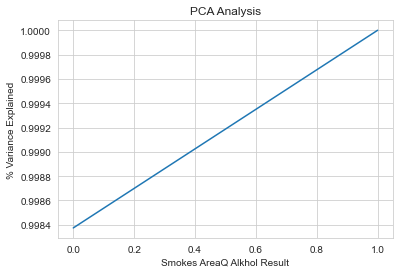

In [103]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Features')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [59]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1,17))) 
print(variance[:])

1     0.950251
2     0.960231
3     0.967009
4     0.972431
5     0.977087
6     0.980888
7     0.984057
8     0.986935
9     0.989504
10    0.991704
11    0.993735
12    0.995571
13    0.997096
14    0.998215
15    0.999233
16    1.000000
dtype: float64


In [61]:
X1 = data[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=10)

In [73]:
# Logistic regression classification
logreg.fit(X1_train, Y1_train)
Y1_predict1 = logreg.predict(X1_test)
logreg_cm = confusion_matrix(Y1_test, Y1_predict1)
score1_logreg = logreg.score(X1_test, Y1_test)

# SVM classification
svmcla.fit(X1_train, Y1_train)
Y1_predict2 = svmcla.predict(X1_test)
svmcla_cm = confusion_matrix(Y1_test, Y1_predict2)
score1_svmcla = svmcla.score(X1_test, Y1_test)

# Random forest classification
rfcla.fit(X1_train, Y1_train)
Y1_predict5 = rfcla.predict(X1_test)
rfcla_cm = confusion_matrix(Y1_test, Y1_predict5)
score1_rfcla = rfcla.score(X1_test, Y1_test)

# Naive Bayes Classification
nbcla.fit(X1_train, Y1_train)
Y1_predict3 = nbcla.predict(X1_test)
nbcla_cm = confusion_matrix(Y1_test, Y1_predict3)
score1_nbcla = nbcla.score(X1_test, Y1_test)

# Decision Tree Classification
dtcla.fit(X1_train, Y1_train)
Y1_predict4 = dtcla.predict(X1_test)
dtcla_cm = confusion_matrix(Y1_test, Y1_predict4)
score1_dtcla = dtcla.score(X1_test, Y1_test)

# KNN Classification
knncla.fit(X1_train, Y1_train)
Y1_predict6 = knncla.predict(X1_test)
knncla_cm = confusion_matrix(Y1_test, Y1_predict6)
score1_knncla = knncla.score(X1_test, Y1_test)

In [74]:
Testscores1 = pd.Series([score1_logreg, score1_svmcla, score1_nbcla, score1_dtcla, score1_rfcla, score1_knncla], index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores1)

Logistic Regression Score       1.000000
Support Vector Machine Score    0.870968
Naive Bayes Score               1.000000
Decision Tree Score             1.000000
Random Forest Score             1.000000
K-Nearest Neighbour Score       0.935484
dtype: float64


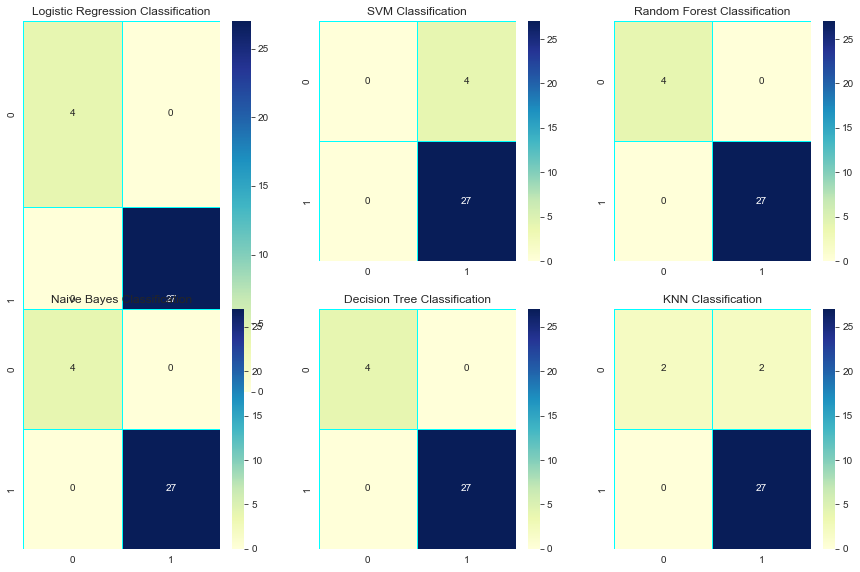

In [101]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax5 = fig.add_subplot(3, 3, 3)
ax5.set_title('Random Forest Classification')
ax3 = fig.add_subplot(3, 3, 4) 
ax3.set_title('Naive Bayes Classification') 
ax4 = fig.add_subplot(3, 3, 5) 
ax4.set_title('Decision Tree Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')

sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)  
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax6)
plt.show()

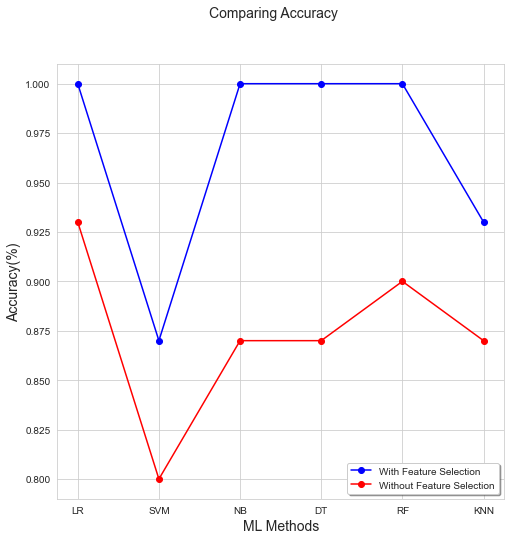

In [158]:
X = ['LR','SVM','NB','DT','RF','KNN']
Y1 = [1,0.87,1,1,1,0.93]
Y2 = [0.93,0.80,0.87,0.87,0.90,0.87]
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(X, Y1, '-ob' ,label='With Feature Selection')
ax.plot(X, Y2, '-or',label='Without Feature Selection')
legend = ax.legend(loc='best', shadow=True, scatterpoints = 6)
legend.get_frame().set_facecolor('white')
fig.suptitle('Comparing Accuracy', fontsize=14)
plt.xlabel('ML Methods', fontsize=14)
plt.ylabel('Accuracy(%)', fontsize=14)
plt.show()